# Linear Models

In [73]:
using CSV, DataFrames, MLDataUtils

In [108]:
using Plots
pyplot()

Plots.PyPlotBackend()

## 1. Read in the data

In [95]:
data = CSV.read("./data/data.csv");

## 2. Filter to 2020 tracks

In [81]:
data2020 = filter(row -> row.year == 2020, data);

## 3. Select only numerical columns

In [84]:
# All the numerical column names
colnames = [
    "acousticness",
    "danceability",
    "duration_ms",
    "energy",
    "explicit",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "mode",
    "speechiness",
    "tempo",
    "valence",
]

X = data2020[:, colnames];

## 4. Select label

We are first treating this as a regular regression problem where for each track we predict the raw popularity score which has a range from 0 to 100.

In [98]:
y = data2020.popularity;

## 5. Some helpful utility functions for getting/printing errors

In [ ]:
function MSE(y, pred)
    return sum((y - pred).^2)/(size(y)[1])  
end

function MAE(y, pred)
    return sum(abs.(y - pred))/(size(y)[1])  
end

function printErrors(train_MSE, test_MSE, train_MAE, test_MAE)
    println("Train MSE\t", train_MSE)
    println("Test MSE \t", test_MSE) 
    println("")
    println("Train MAE\t", train_MAE)
    println("Test MAE \t", test_MAE) 
end

## 6. Train test split

Using the splitobs function in `MLDataUtils.jl` to create a 70/30 train test split

In [87]:
Xtrain, Xtest = splitobs(X, at = 0.7);
ytrain, ytest = splitobs(y, at = 0.7);

## 7. Train the model

In [90]:
w_train = convert(Matrix, Xtrain) \ convert(Array, ytrain)

13-element Array{Float64,1}:
   3.556333031481273
  42.49117317540465
  -3.699870676862822e-5
  28.18543701136224
   7.6032284100208685
  -5.648683925200404
  -0.06642517715708617
   9.834405531504977
  -1.7265355844651613
   1.8097164391290763
 -12.426338260359858
   0.10235244707290483
 -12.074245043281554

## 8. Predict on training and test sets

In [92]:
train_pred = convert(Matrix, Xtrain)*w_train;
test_pred = convert(Matrix, Xtest)*w_train;

## 9. Report Errors

In [93]:
train_MSE = MSE(ytrain, train_pred)
test_MSE = MSE(ytest, test_pred)

train_MAE = MAE(ytrain, train_pred)
test_MAE = MAE(ytest, test_pred);

printErrors(train_MSE, test_MSE, train_MAE, test_MAE)

Train MSE	444.1237426559384
Test MSE 	485.18355833891275

Train MAE	14.737165131715496
Test MAE 	15.608320215215517


## 10. Get $w$ for each decade and compare

In [107]:
all_weights = []
all_train_MAE = []
all_test_MAE = []

for year in 1930:10:2020
    # get data for this year
    data_decade = filter(row -> row.year == year, data);
    
    # set up X and y
    X = data_decade[:, colnames];
    y = data_decade.popularity;
    
    # train test split
    Xtrain, Xtest = splitobs(X, at = 0.7);
    ytrain, ytest = splitobs(y, at = 0.7);
    
    # train the model
    w_train = convert(Matrix, Xtrain) \ convert(Array, ytrain);
    push!(all_weights, w_train)
    
    # predict
    train_pred = convert(Matrix, Xtrain)*w_train;
    test_pred = convert(Matrix, Xtest)*w_train;
    
    # evaluate & report errors
    train_MSE = MSE(ytrain, train_pred);
    test_MSE = MSE(ytest, test_pred);

    train_MAE = MAE(ytrain, train_pred);
    push!(all_train_MAE, train_MAE);
    test_MAE = MAE(ytest, test_pred);
    push!(all_test_MAE, test_MAE);
    
    println("=======================Year: ", year, "=======================")
    printErrors(train_MSE, test_MSE, train_MAE, test_MAE);
end

=======================Year: 1930=======================
Train MSE	11.64168087481898
Test MSE 	1.8321566993848282

Train MAE	1.6803242987788483
Test MAE 	1.0614022373330396
=======================Year: 1940=======================
Train MSE	9.958546100693331
Test MSE 	1.7048893998348396

Train MAE	1.6724109033592682
Test MAE 	1.0432084612831223
=======================Year: 1950=======================
Train MSE	45.1184587505503
Test MSE 	14.883854887379451

Train MAE	4.41593341973625
Test MAE 	3.049554808371529
=======================Year: 1960=======================
Train MSE	147.67333489034587
Test MSE 	29.25649066793411

Train MAE	9.650016596236595
Test MAE 	4.153186455573451
=======================Year: 1970=======================
Train MSE	182.84268451763688
Test MSE 	43.25448013171149

Train MAE	10.909098179838496
Test MAE 	5.114302875989835
=======================Year: 1980=======================
Train MSE	156.99121673718474
Test MSE 	58.701956229661555

Train MAE	10.1283697334541

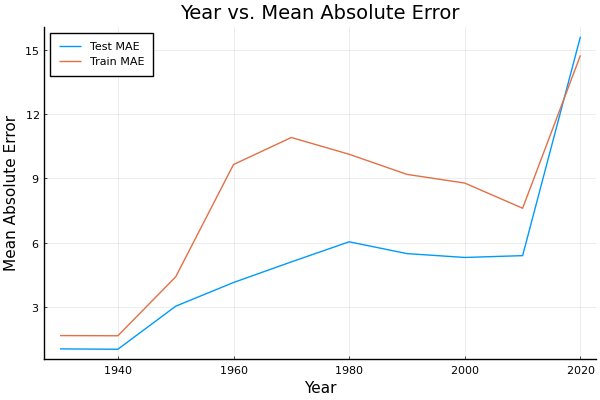

In [115]:
plot(1930:10:2020, all_test_MAE, label="Test MAE")
plot!(1930:10:2020, all_train_MAE, label="Train MAE")
xlabel!("Year")
ylabel!("Mean Absolute Error")
title!("Year vs. Mean Absolute Error")

In [133]:
year_to_index(year) = (year-1920) / 10
get_col_weights(j) = (y) -> all_weights[Int(year_to_index(y))][j]

get_col_weights (generic function with 1 method)

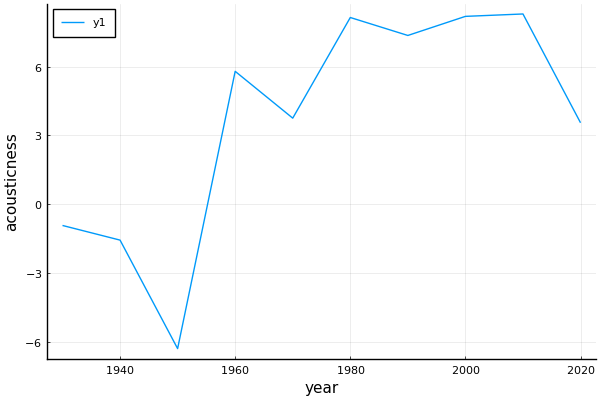

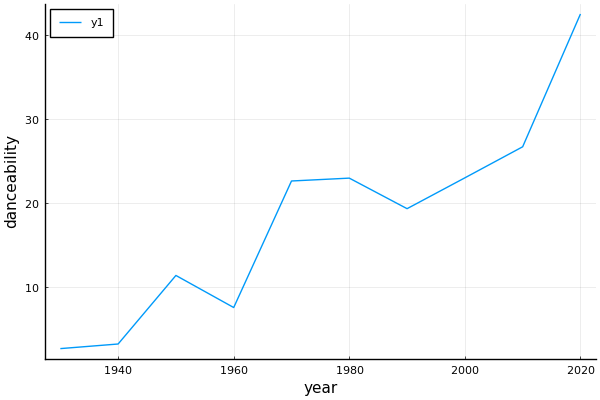

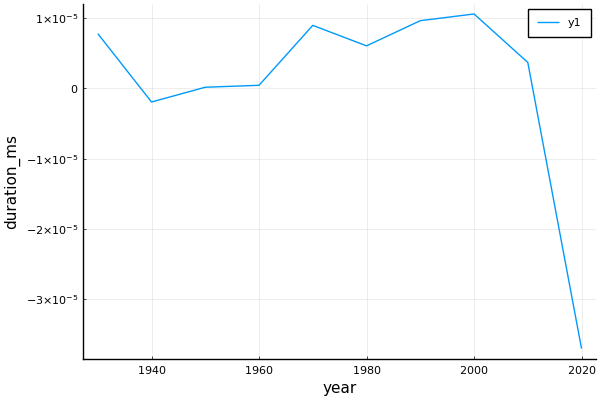

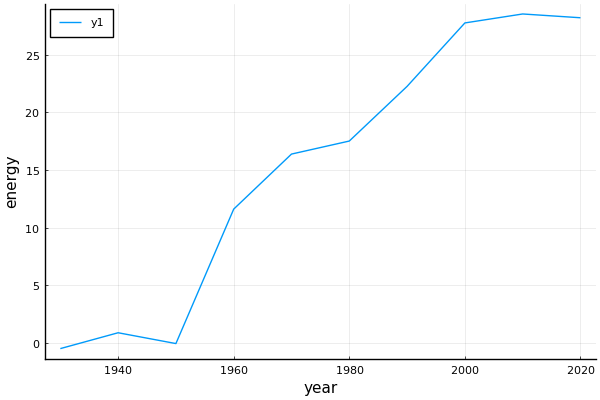

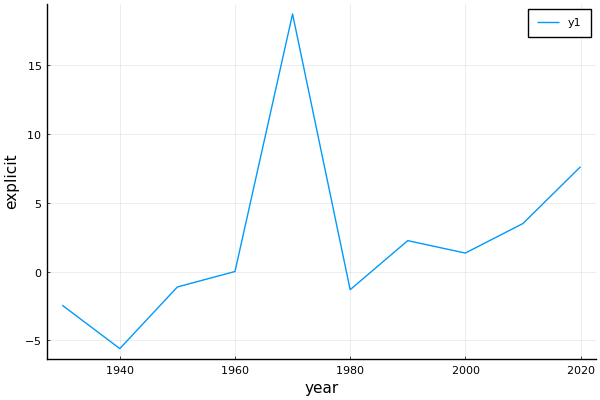

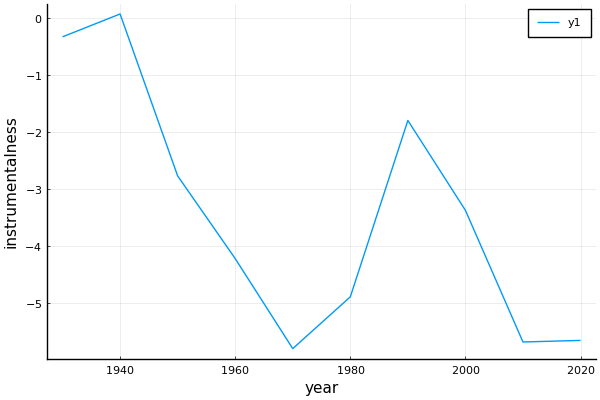

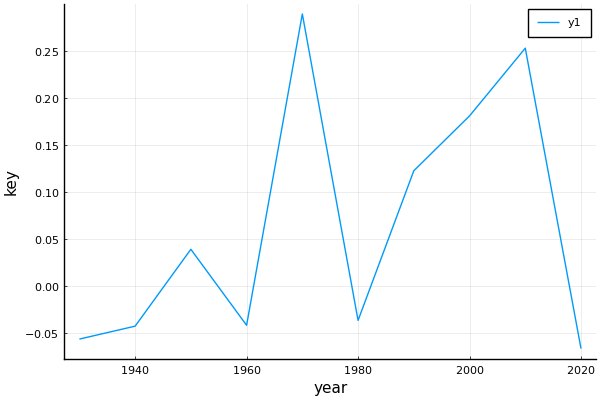

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parame

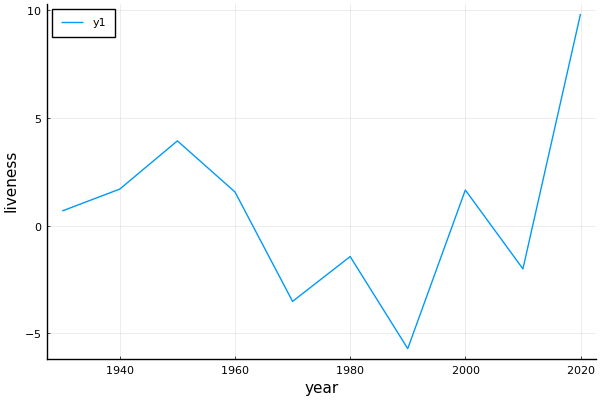

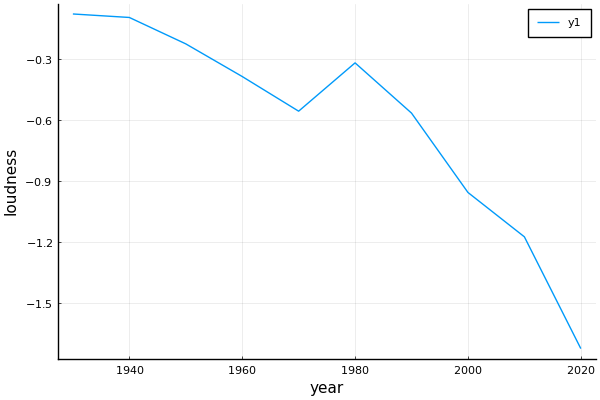

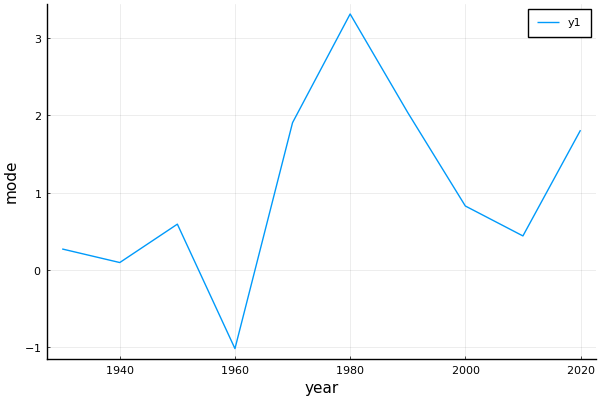

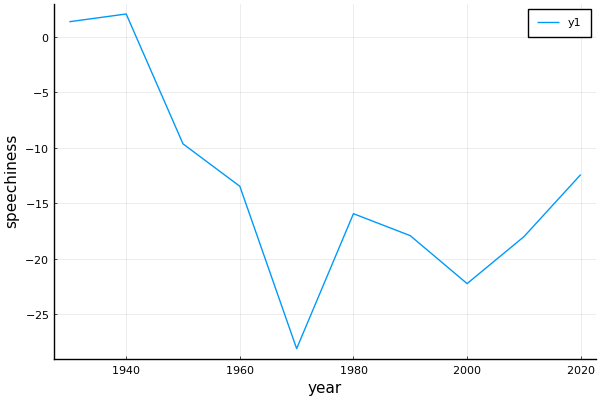

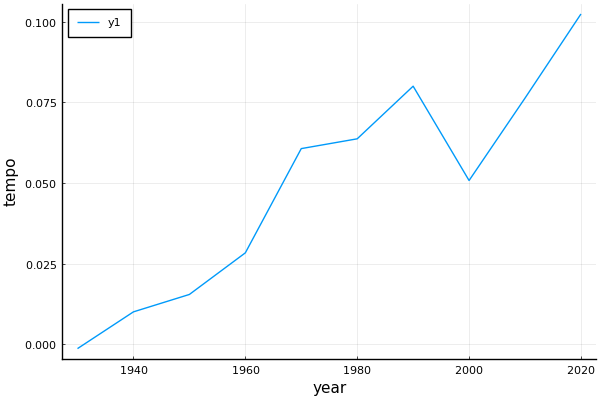

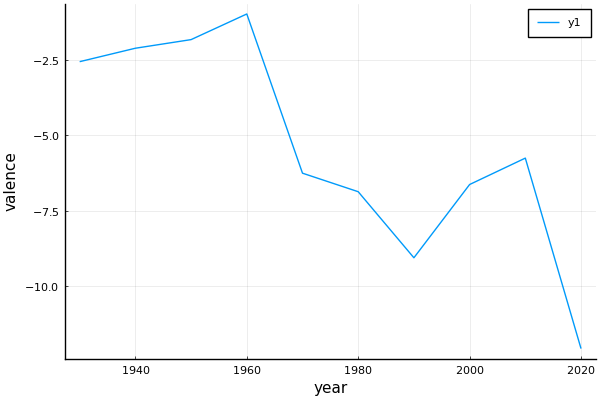

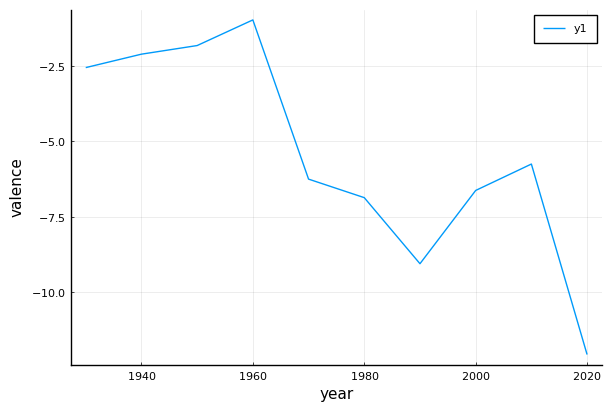

In [138]:
for i in 1:size(colnames,1)
    c = colnames[i]
    p = plot(get_col_weights(i), 1930:10:2020, xlabel="year", ylabel=c)
    display(p)
    sleep(1)
end

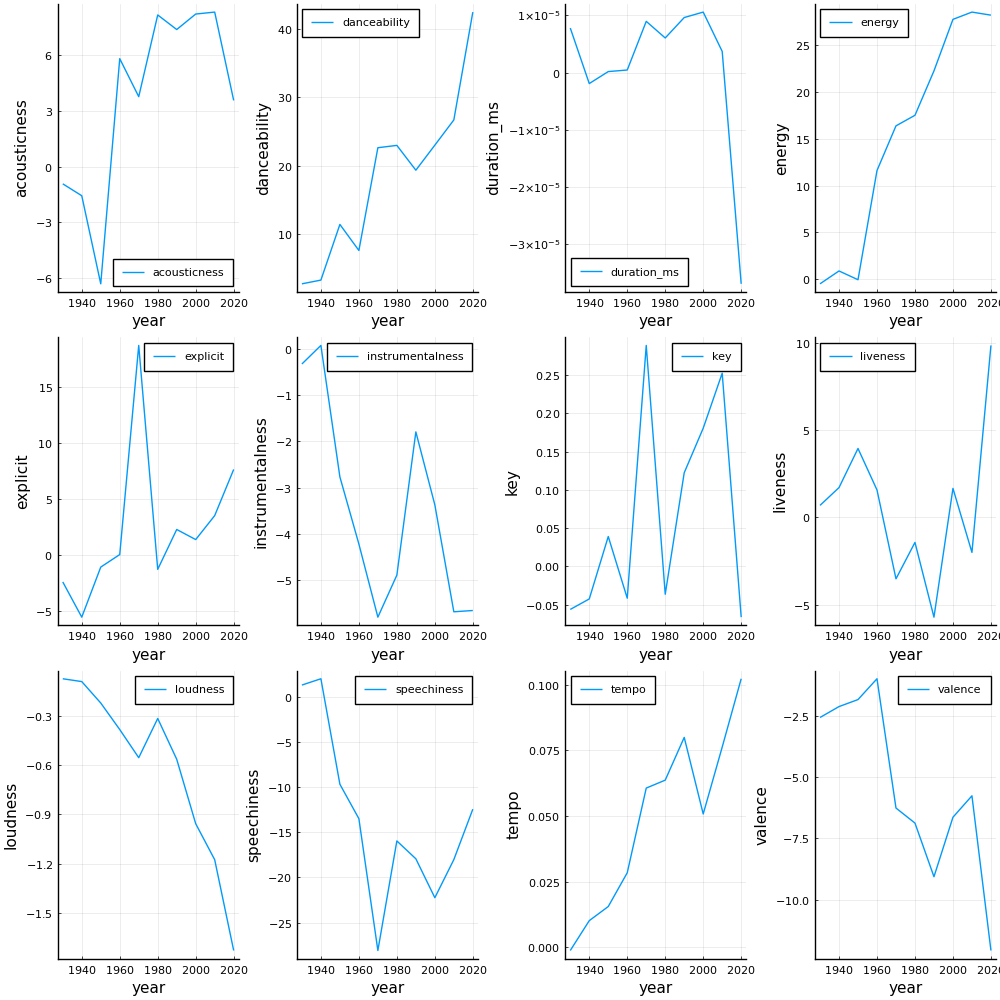

In [152]:
weight_plots = []
num_cols = size(colnames,1)

for i in 1:num_cols
    c = colnames[i]
    if (c != "mode")
        p = plot(get_col_weights(i), 1930:10:2020, xlabel="year", ylabel=c, label=c)
        push!(weight_plots, p)
    end
end

weights_plot = plot(weight_plots..., layout=(3, 4), size=(1000,1000))

In [155]:
png("imgs/weights_lm")